In [373]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


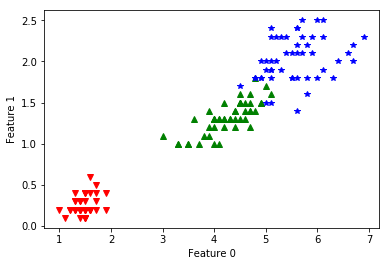

In [379]:
'''
Only adjust the first two lines of the code.
Load your data set into the variable 'dataset'. Then choose two features to construct the X matrix and store the
corresponding labels into the variable 'c'. The rest of the code will provide the desired output.
The example below demonstrates how to use the program.
'''
dataset = datasets.load_iris()
X, c = dataset['data'][:,2:], dataset['target']
big_data=np.column_stack([X,c])
N, M = X.shape

classes = list(np.unique(c))
markers=['v','^','*','H','+','x','X','D','d','|','_']
colors=['r','g','b','k','y','m']
class_shapes = list()
class_colors = list()
for i in range(N):
    class_shapes.append(markers[classes.index(c[i])])
    class_colors.append(colors[classes.index(c[i])])
for j in range(N):
    plt.plot(X[j,0],X[j,1], class_shapes[j], color = class_colors[j])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

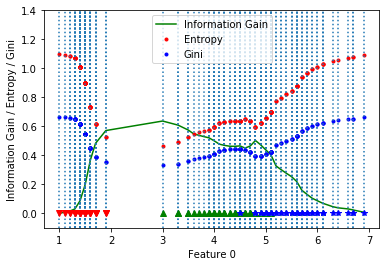

In [383]:
entropy = list()
gini = list()
info_gain = list()
class_list = np.unique(c)
p=list()
for i in class_list:
    p.append(len(big_data[big_data[:,2] == i])/len(c))
begin_entropy = -np.sum(p*np.log(p))
for tau in X[:,0]:
    left = big_data[big_data[:,0]<tau]
    right = big_data[big_data[:,0]>= tau]
    left_class = left[:,2]
    right_class= right[:,2]
    left_class = list(set(left_class))
    right_class = list(set(right_class))
    p_left = []
    p_right = []
    
    for i in left_class:
        p_left.append(len(left[left[:,2]== i])/len(left))
    for i in right_class:
        p_right.append(len(right[right[:,2]== i])/len(right))
    left_entropy = -np.sum(p_left*np.log(p_left))
    right_entropy = -np.sum(p_right*np.log(p_right))
    left_gini = 1 -np.sum(np.asarray(p_left)**2)
    right_gini = 1 -np.sum(np.asarray(p_right)**2)
        

    entropy.append((len(left)/N)*left_entropy + (len(right)/N)*right_entropy)
    gini.append((len(left)/N)*left_gini + (len(right)/N)*right_gini)
for i in entropy:
    info_gain.append(begin_entropy-i)

#x_with_ig is created for plotting purposes.
x_with_ig = np.column_stack([X,info_gain])
x_with_ig = x_with_ig[x_with_ig[:,0].argsort()]

plt.plot(x_with_ig[:,0], x_with_ig[:,2], 'g')
for i in range(N):
    plt.plot(X[i,0], entropy[i], '.r')
    plt.plot(X[i,0], gini[i], '.b')
    plt.axvline(x=X[i,0], ls=":")    
    plt.plot(X[i,0],0, class_shapes[i], color = class_colors[i])

plt.xlabel('Feature 0')
plt.ylabel('Information Gain / Entropy / Gini')
plt.ylim([-0.1,1.4])
plt.legend(['Information Gain','Entropy','Gini'])
plt.show()

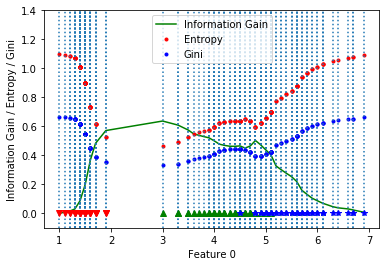

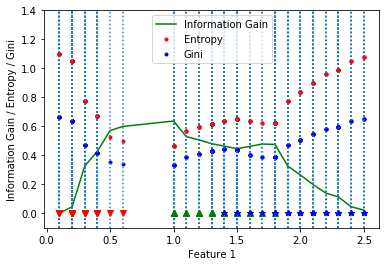

In [389]:
for feature_no in range(M):
    entropy = list()
    gini = list()
    info_gain = list()
    class_list = np.unique(c)
    p=list()
    for i in class_list:
        p.append(len(big_data[big_data[:,2] == i])/len(c))
    begin_entropy = -np.sum(p*np.log(p))
    for tau in X[:,feature_no]:
        left = big_data[big_data[:,feature_no]<tau]
        right = big_data[big_data[:,feature_no]>= tau]
        left_class = left[:,2]
        right_class= right[:,2]
        left_class = list(set(left_class))
        right_class = list(set(right_class))
        p_left = []
        p_right = []

        for i in left_class:
            p_left.append(len(left[left[:,2]== i])/len(left))
        for i in right_class:
            p_right.append(len(right[right[:,2]== i])/len(right))
        left_entropy = -np.sum(p_left*np.log(p_left))
        right_entropy = -np.sum(p_right*np.log(p_right))
        left_gini = 1 -np.sum(np.asarray(p_left)**2)
        right_gini = 1 -np.sum(np.asarray(p_right)**2)


        entropy.append((len(left)/N)*left_entropy + (len(right)/N)*right_entropy)
        gini.append((len(left)/N)*left_gini + (len(right)/N)*right_gini)
    for i in entropy:
        info_gain.append(begin_entropy-i)

    #x_with_ig is created for plotting purposes.
    x_with_ig = np.column_stack([X,info_gain])
    x_with_ig = x_with_ig[x_with_ig[:,feature_no].argsort()]

    plt.plot(x_with_ig[:,feature_no], x_with_ig[:,2], 'g')
    for i in range(N):
        plt.plot(X[i,feature_no], entropy[i], '.r')
        plt.plot(X[i,feature_no], gini[i], '.b')
        plt.axvline(x=X[i,feature_no], ls=":")    
        plt.plot(X[i,feature_no],0, class_shapes[i], color = class_colors[i])

    plt.xlabel('Feature '+str(feature_no))
    plt.ylabel('Information Gain / Entropy / Gini')
    plt.ylim([-0.1,1.4])
    plt.legend(['Information Gain','Entropy','Gini'])
    plt.show()